In [430]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score,silhouette_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.utils import Bunch
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [431]:
iris: Bunch = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [432]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


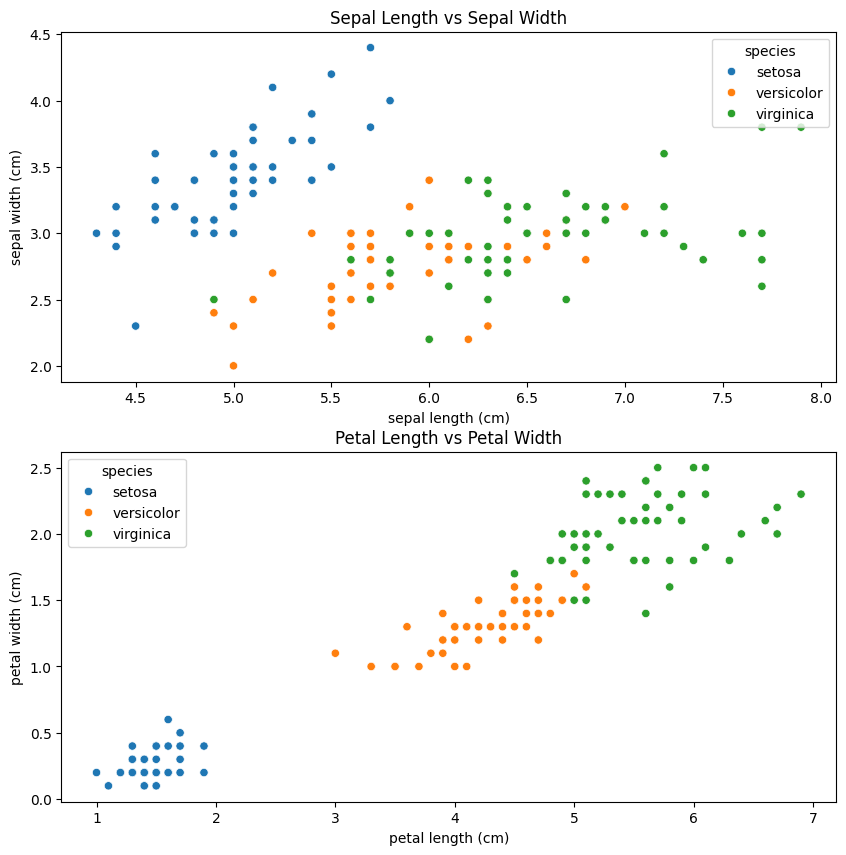

In [433]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 1, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal Length vs Petal Width')

plt.show()

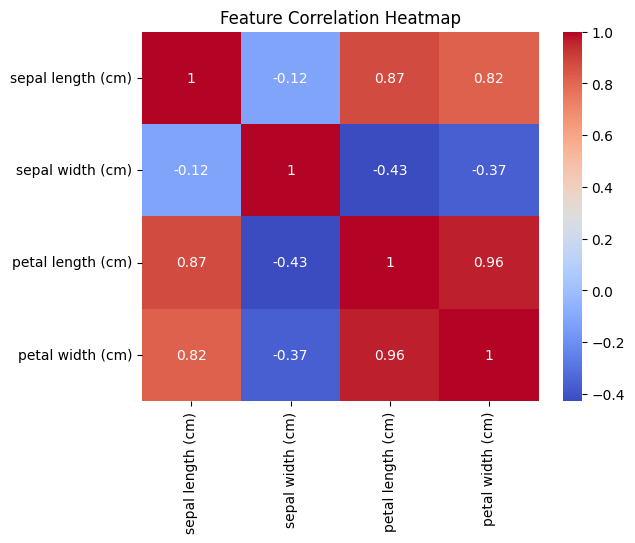

In [434]:
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 1. KMeans Clustering

In [435]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

In [436]:
# fit with sepal length and sepal width
kmeans.fit(X[:, 2:4])
labels = kmeans.labels_

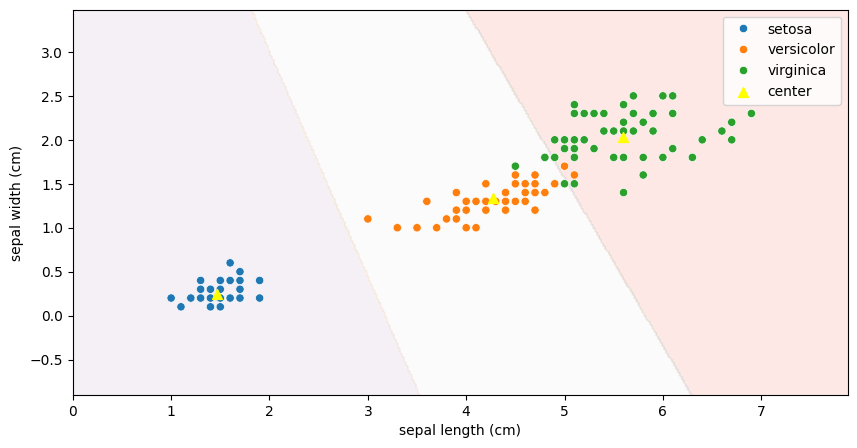

In [437]:
h = 0.02
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow', marker='^', label='center')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


In [438]:
# Model evaluation
from scipy.stats import mode

ars = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Score: {round(ars, 3)}")

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {round(sil_score, 3)}")

def map_cluster_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        new_labels[mask] = mode(true_labels[mask], keepdims=False).mode
    return new_labels

mapped_labels = map_cluster_labels(y, labels)

acc = accuracy_score(y, mapped_labels)
conf_mat = confusion_matrix(y, mapped_labels)

print("Accuracy:", round(acc, 3))
print("Confusion Matrix:\n", conf_mat)


Adjusted Rand Score: 0.886
Silhouette Score: 0.522
Accuracy: 0.96
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


In [439]:
print(classification_report(y, mapped_labels, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



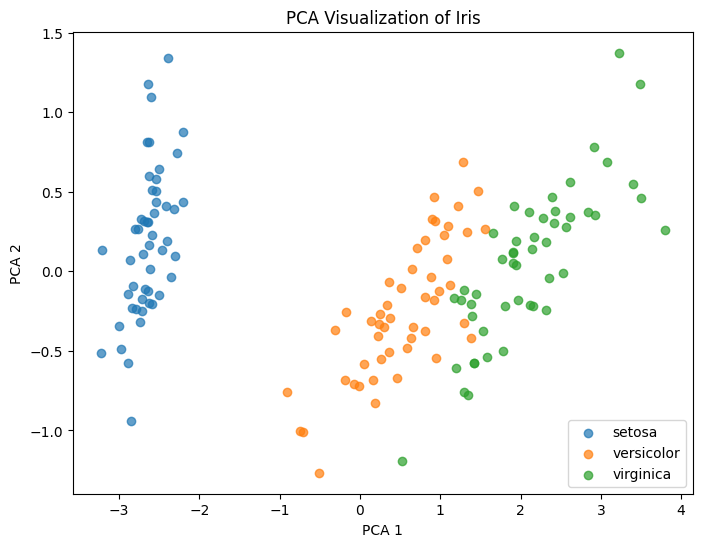

In [440]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_reduced[y == i, 0],
        X_reduced[y == i, 1],
        label=target_name,
        alpha=0.7
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Visualization of Iris')
plt.legend()
plt.show()

In [441]:
kmeans.fit(X_reduced)
labels = kmeans.labels_

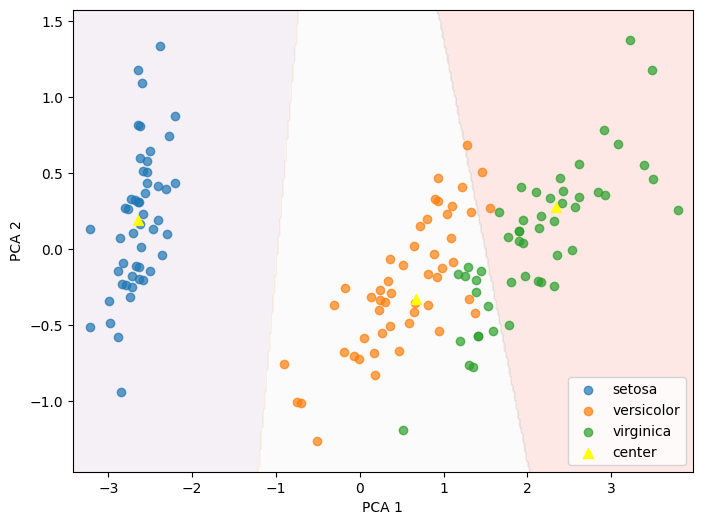

In [442]:
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.2, X_reduced[:, 0].max() + 0.2
y_min, y_max = X_reduced[:, 1].min() - 0.2, X_reduced[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_reduced[y == i, 0],
        X_reduced[y == i, 1],
        label=target_name,
        alpha=0.7
    )


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow', marker='^', label='center')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [443]:
# Model evaluation
from scipy.stats import mode

ars = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Score: {round(ars, 3)}")

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {round(sil_score, 3)}")

def map_cluster_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        new_labels[mask] = mode(true_labels[mask], keepdims=False).mode
    return new_labels

mapped_labels = map_cluster_labels(y, labels)

acc = accuracy_score(y, mapped_labels)
conf_mat = confusion_matrix(y, mapped_labels)

print("Accuracy:", round(acc, 3))
print("Confusion Matrix:\n", conf_mat)


Adjusted Rand Score: 0.716
Silhouette Score: 0.551
Accuracy: 0.887
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


In [444]:
print(classification_report(y, mapped_labels, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.94      0.85        50
   virginica       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [445]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(range(X.shape[0]), k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k]
        centers[k] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
    return centers, labels

def predict_new_point(x_new, centers):
    distances = cdist(x_new, centers)
    return np.argmin(distances, axis=1)

centers, predict_labels = kmeans(X[:,2:4], n_clusters)


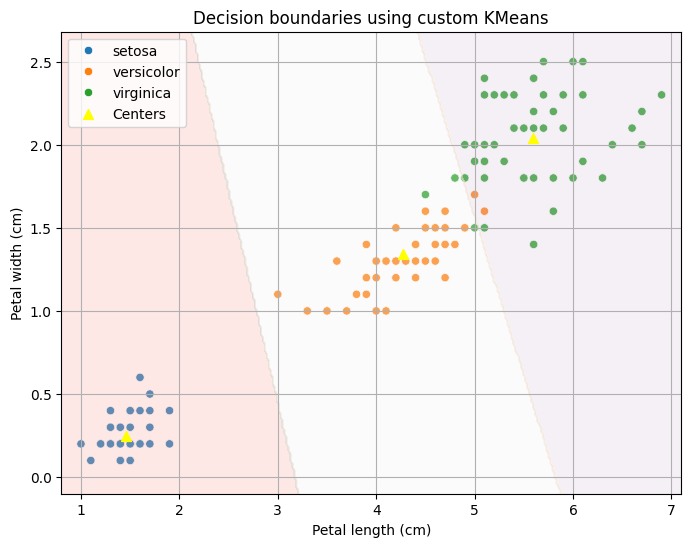

In [446]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal Length vs Petal Width')

h = 0.02
x_min, x_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
y_min, y_max = X[:, 3].min() - 0.2, X[:, 3].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = predict_new_point(grid_points, centers[-1])  # centers[-1] là tâm cuối
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

centers_arr = np.array(centers[-1])
plt.scatter(centers_arr[:, 0], centers_arr[:, 1],
            s=50, c='yellow', marker='^', label='Centers')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision boundaries using custom KMeans')
plt.legend()
plt.grid(True)
plt.show()

In [447]:
centers, predict_labels = kmeans(X_reduced, n_clusters)

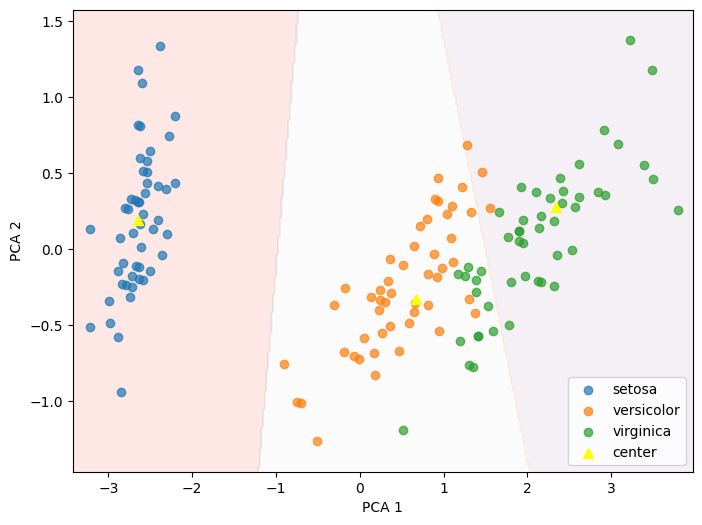

In [448]:
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.2, X_reduced[:, 0].max() + 0.2
y_min, y_max = X_reduced[:, 1].min() - 0.2, X_reduced[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict_new_point(np.c_[xx.ravel(), yy.ravel()], centers[-1])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_reduced[y == i, 0],
        X_reduced[y == i, 1],
        label=target_name,
        alpha=0.7
    )


plt.scatter(centers[-1][:, 0], centers[-1][:, 1], s=50, c='yellow', marker='^', label='center')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [449]:
# Model evaluation
from scipy.stats import mode

ars = adjusted_rand_score(y, predict_labels[-1])
print(f"Adjusted Rand Score: {round(ars, 3)}")

sil_score = silhouette_score(X, predict_labels[-1])
print(f"Silhouette Score: {round(sil_score, 3)}")

def map_cluster_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        new_labels[mask] = mode(true_labels[mask], keepdims=False).mode
    return new_labels

mapped_labels = map_cluster_labels(y, predict_labels[-1])

acc = accuracy_score(y, mapped_labels)
conf_mat = confusion_matrix(y, mapped_labels)

print("Accuracy:", round(acc, 3))
print("Confusion Matrix:\n", conf_mat)


Adjusted Rand Score: 0.716
Silhouette Score: 0.551
Accuracy: 0.887
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


# 2. K-nearest neighbors


In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('Number of classes: %d' %len(np.unique(y)))
print('Number of data points: %d' %len(y))

X0 = X[y == 0,:]
print('\nSamples from class 0:\n', X0[:5,:])

X1 = X[y == 1,:]
print('\nSamples from class 1:\n', X1[:5,:])

X2 = X[y == 2,:]
print('\nSamples from class 2:\n', X2[:5,:])


Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [451]:
datasets.load_iris(as_frame=True).data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [452]:
X, X_test, y, y_test = train_test_split(X, y, test_size=50)

print('Training size: %d' %len(y))
print('Test size: %d' %len(y_test))


Training size: 100
Test size: 50


In [453]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [454]:
accuracy_score(y_test, knn.predict(X_test))

0.96

In [455]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=50)




Text(0, 0.5, 'PCA 2')

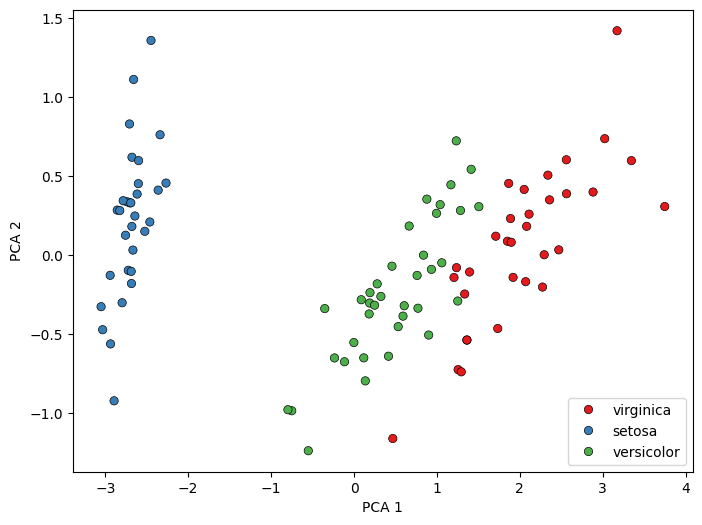

In [456]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=iris.target_names[y], palette='Set1', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [457]:
knn.fit(X_train_reduced, y_train_reduced)
y_pred = knn.predict(X_test_reduced)


In [458]:
accuracy_score(y_test_reduced, y_pred)


0.94

Text(0, 0.5, 'PCA 2')

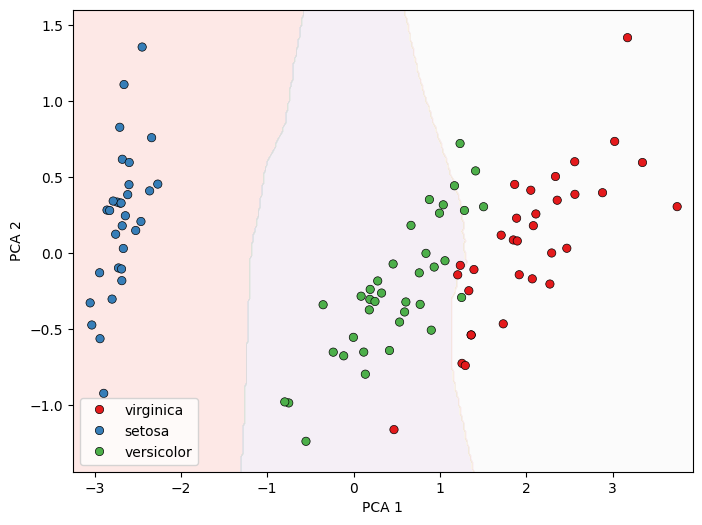

In [459]:
plt.figure(figsize=(8, 6))

h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.2, X_reduced[:, 0].max() + 0.2
y_min, y_max = X_reduced[:, 1].min() - 0.2, X_reduced[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=iris.target_names[y], palette='Set1', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [469]:
from collections import Counter
from sklearn.preprocessing import StandardScaler

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def _predict_point(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._predict_point(x) for x in X])

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

knn = KNN(k=3)
knn.fit(X, y)
accuracy_score(y_test, knn.predict(X_test))

0.98

In [470]:
knn.fit(X_train_reduced, y_train_reduced)
accuracy_score(y_test_reduced, knn.predict(X_test_reduced))

0.9

Text(0, 0.5, 'PCA 2')

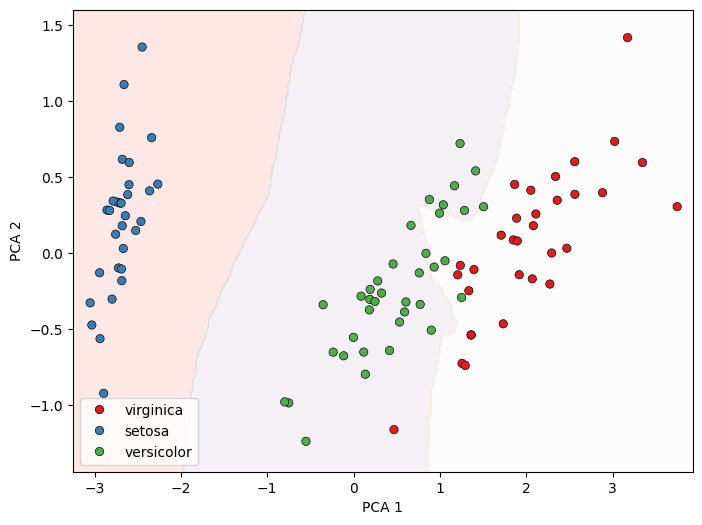

In [471]:
plt.figure(figsize=(8, 6))
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.2, X_reduced[:, 0].max() + 0.2
y_min, y_max = X_reduced[:, 1].min() - 0.2, X_reduced[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=iris.target_names[y], palette='Set1', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

